# Exploration of the .skeleton files provided in the NTU-RGB-D dataset

The aim of this notebook is to extract the 3D coordinates of the .skeleton files and play them back. The sample names follow the notation SsssCcccPpppRrrrAaaa with :

S : setup number 

C : camera id

P : performer id

R : replication number

A : action label

In [117]:

import numpy as np
import os
import random
import sys
sys.path.append('.')
sys.path.append('..')
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

from play_skeleton import *
# from src.utils.joints import *
# from src.data.read_NTU_RGB_D_skeleton import *

# Global variables (change depending on your setup)
# project_dir = os.getcwd() + '/../'
# raw_data = project_dir + "data/raw/"
# skeleton_folder = raw_data + "nturgb+d_skeletons/"
# skeleton_folder = './'


#### 아래는, .npy -> .skeleton로 변경하는 코드 (실행시, 파일명 및 경로 수정필요)

In [118]:
import numpy as np
import os

# npy_folder = "./nturgb+d_skeletons/"
skeleton_folder = "./skeleton/"
npy_folder = "./npy/"
#skeleton_folder = "./test_skeleton/"

def makeSkeletonFile(npy_name):
    print(npy_name + "is processed...")
    npy_file = npy_folder + npy_name
    skeleton_file = skeleton_folder + npy_name[:-4] + ".skeleton"

    arr = np.load(npy_file, allow_pickle=True)
    listOfData = arr.tolist()

    dictOfTypeIdx = {0:1, 1:2, 2:4, 3:27, 4:6,
                    5:7, 6:8, 7:9, 8:13, 9:14, 10:15,
                    11:16, 12:19, 13:20, 14:21, 15:22,
                    16:23, 17:24, 18:25, 19:26, 20:3,
                    21:10, 22:11, 23:17, 24:18}
    listOfResult = [0 for _ in range(25)]

    with open(skeleton_file, 'w') as f:
        f.write(str(len(listOfData)) + "\n\n")
        for i in range(len(listOfData)):
            idx = 0
            # frame: 0부터 시작 ++
            # 사람수: 무조건 1로 둠

            for j in range(len(listOfData[i])):
                listOfResult[idx] = listOfData[i][j]
                idx += 1
            
            for j in range(25):
                temp = str(listOfResult[j])[1:-1]
                temp = temp.replace(',', '')
                f.write(temp + "\n")
                
            listOfResult = [0 for _ in range(25)]
            f.write("\n")


    f.close()
    print(skeleton_file + " is saved.")

for(root, directories, files) in os.walk(npy_folder):
    for file in files:
        makeSkeletonFile(file)

S002C001P003R003A004.npyis processed...


IndexError: list assignment index out of range

In [ ]:
# arr = np.load("./Skeleton/S001C001P001R003A004.npy", allow_pickle=True)
# listOfData = arr.tolist()
# # print(arr)
# dictOfTypeIdx = {0:1, 1:2, 2:4, 3:27, 4:6,
#                  5:7, 6:8, 7:9, 8:13, 9:14, 10:15,
#                  11:16, 12:19, 13:20, 14:21, 15:22,
#                  16:23, 17:24, 18:25, 19:26, 20:3,
#                  21:10, 22:11, 23:17, 24:18}
# listOfResult = [0 for i in range(25)]


# f = open("./S001C001P001R001A002.skeleton", 'w')
# f.write(str(len(listOfData)) + "\n\n")
# for i in range(len(listOfData)):
#     idx = 0
#     # frame: 0부터 시작 ++
#     # 사람수: 무조건 1로 둠

#     for j in range(1, len(listOfData[i])):
#         if j in dictOfTypeIdx.values():
#             listOfResult.insert(idx, arr[i][dictOfTypeIdx[idx]])
#             idx = idx + 1
                    
#     for j in range(25):
#         temp = str(listOfResult[j])[1:-1]
#         temp = temp.replace(',','')
#         f.write(temp + "\n")
#     listOfResult = [0 for i in range(25)]
#     f.write("\n")
    
# f.close()



# # 1: 골반, 2: 배꼽, 3: 목, 4: 머리, 5: 왼쪽 어깨
# # 6: 왼쪽 팔꿈치, 7: 왼쪽 손목, 8: 왼쪽 손, 9: 오른쪽 어깨, 10: 오른쪽 팔꿈치
# # 11: 오른쪽 손목, 12: 오른쪽 손, 13: 왼쪽 엉덩이, 14: 왼쪽 무릎, 15: 왼쪽 발목
# # 16: 왼쪽 발, 17: 오른쪽  엉덩이, 18: 오른쪽 무릎, 19: 오른쪽 발목, 20: 오른쪽 발
# # 21: 가슴, 22: 왼쪽 손가락, 23: 왼쪽 엄지, 24: 오른쪽 손가락, 25: 오른쪽 엄지


#### 아래는 .skeleton으로 변경한 코드를 skeleton shape를 변경하는 코드 (실행시, 파일명 및 경로 수정필요)

## 1. Choose a random sample

In [ ]:
# sample_name = os.path.splitext(random.choice(os.listdir(skeleton_folder)))[0]
# sample_name= "S001C002P001R001A011"
# sample_name = "S002C002P007R002A017"
sample_name = "S001C001P001R004A002"
print("Chosen sample name : " + str(sample_name))

Chosen sample name : S001C001P001R004A002


In [ ]:
def read_skeleton(file):
    with open(file, 'r') as f:
        skeleton_sequence = {'numFrame': int(f.readline()), 'frameInfo': []}
        
        for t in range(skeleton_sequence['numFrame']):
            # frame_info = {'bodyInfo': []}
            frame_info = {'numBody': 1, 'bodyInfo': []}
            # print(frame_info['numBody'])
            for m in range(frame_info['numBody']):
            #     body_info_key = [
            #         'bodyID', 'clipedEdges', 'handLeftConfidence',
            #         'handLeftState', 'handRightConfidence', 'handRightState',
            #         'isResticted', 'leanX', 'leanY', 'trackingState'
            #     ]
            #     body_info = {
            #         k: float(v)
            #         for k, v in zip(body_info_key, f.readline().split())
            #     }
            #     # print(body_info)
            #     body_info['numJoint'] = int(f.readline())               # 25
            #     # print(body_info['numJoint'])
            #     body_info['jointInfo'] = []
                f.readline()
                body_info = {'jointInfo': []}
                for v in range(25):
                    joint_info_key = [
                        'x', 'y', 'z'
                    ]
                    joint_info = {
                        k: float(v)
                        for k, v in zip(joint_info_key, f.readline().split())
                    }
                    if joint_info != {}:
                        body_info['jointInfo'].append(joint_info)
                    # print(body_info['jointInfo'])
                frame_info['bodyInfo'].append(body_info)
                # print(body_info)
                # print(frame_info['bodyInfo'])
            skeleton_sequence['frameInfo'].append(frame_info)
    # print(skeleton_sequence)
    return skeleton_sequence


def read_xyz(file, max_body=2, num_joint=25):
    seq_info = read_skeleton(file)
    # print(seq_info)
    data = np.zeros((3, seq_info['numFrame'], num_joint, max_body), dtype=np.float32)
    # print(data)
    # print(seq_info['frameInfo'])
    for n, f in enumerate(seq_info['frameInfo']):
        for m, b in enumerate(f['bodyInfo']):
            for j, v in enumerate(b['jointInfo']):
                if m < max_body and j < num_joint:
                    # print(v['x'], v['y'], v['z'])
                    data[:, n, j, m] = [v['x'], v['y'], v['z']]
                else:
                    pass
    data = np.around(data, decimals=3)
    # print(data)

    return data


# def read_skeleton(file):
#     with open(file, 'r') as f:
#         skeleton_sequence = {'numFrame': int(f.readline()), 'frameInfo': []}

#         for t in range(skeleton_sequence['numFrame']):
#             frame_info = {'numBody': 1, 'bodyInfo': []}
#             f.readline()
#             for m in range(frame_info['numBody']):
#                 body_info = {'jointInfo': []}
#                 f.readline()
#                 for v in range(25):
#                     joint_info_key = ['x', 'y', 'z']
#                     joint_info = {
#                         k: float(val)
#                         for k, val in zip(joint_info_key, f.readline().split()[1:])
#                     }
#                     body_info['jointInfo'].append(joint_info)
#                 frame_info['bodyInfo'].append(body_info)
#             skeleton_sequence['frameInfo'].append(frame_info)

#     return skeleton_sequence


# def read_xyz(file, max_body=2, num_joint=25):
#     seq_info = read_skeleton(file)
#     data = np.zeros((3, seq_info['numFrame'], num_joint, max_body), dtype=np.float32)
#     for n, f in enumerate(seq_info['frameInfo']):
#         for m, b in enumerate(f['bodyInfo']):
#             for j, v in enumerate(b['jointInfo']):
#                 if m < max_body and j < num_joint:
#                     joint_data = v  # Access the joint information correctly
#                     data[:, n, j, m] = [joint_data['x'], joint_data['y'], joint_data['z']]
#                 else:
#                     pass
#     data = np.around(data, decimals=3)
#     return data

## 2. Extract skeleton coordinates

read_xyz(...) returns a (3, max_frame, num_joint=25, 2) numpy array

read_color_xy(...) returns (2, max_frame, num_joint=25, 2) numpy array

In [ ]:
skeleton = read_xyz('./' + sample_name + ".skeleton") # shape (3, 103, 25, 2)
print(skeleton.shape)
print(skeleton[0,0,0,:])
print("===== 3D skeleton =====")
print(skeleton[0, 0, :, 0], "\n")
print(skeleton[0, :, 0, 0], "\n")
print(skeleton[:, 0, 0, 0], "\n")
print(skeleton[:, 0, :, 0], "\n")

print(skeleton.transpose(3, 2, 0, 1)[0].shape)

# has_2_subjects = np.any(skeleton[:, :, :, 1])
# print("Number of subjects : " + str(int(has_2_subjects) * 2))

FileNotFoundError: [Errno 2] No such file or directory: './S001C001P001R004A002.skeleton'

## 3. Playback skeleton animation (first subject only)

/home/eslab/바탕화면/jangjange/npyToSkeleton/test/play_skeleton.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


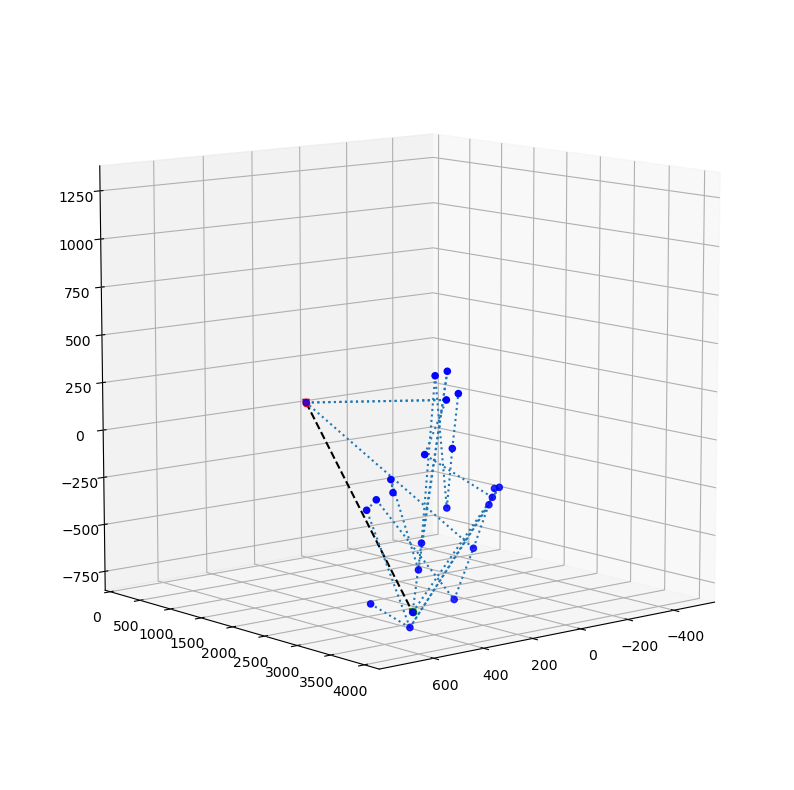

In [ ]:
# connexion_tuples = np.array([
#     [0,1],
#     [1,20],
#     [2,3],
#     [2,4],
#     [4,5],
#     [5,6],
#     [6,7],
#     [2,8],
#     [8,9],
#     [9,10],
#     [10,11],
#     [0,12],
#     [12,13],
#     [13,14],
#     [14,15],
#     [0,16],
#     [16,17],
#     [17,18],
#     [18,19],
#     [20,2],
#     [7,21],
#     [7,22],
#     [11,23],
#     [11,24]
# ])


connexion_tuples = np.array([
    [0,1],
    [1,20],
    [2,3],
    [2,4],
    [4,5],
    [5,6],
    [6,7],
    [2,8],
    [8,9],
    [9,10],
    [10,11],
    [0,12],
    [12,13],
    [13,14],
    [14,15],
    [0,16],
    [16,17],
    [17,18],
    [18,19],
    [20,2],
    [7,21],
    [7,22],
    [11,23],
    [11,24]
])
animateJointCoordinates(skeleton.transpose(3, 2, 0, 1)[0], connexion_tuples)